# 캘리포니아 주택 가격 예측
| 변수명 | 설명 | 데이터타입 |
|----------|------------|-----|
| longitude| 경도	| Continuous |
| latitude | 위도   | Continuous |
| housingmedianage | 주택나이(중앙값) | Continuous |
| total_rooms | 전체 방 수 | Continuous |
| total_bedrooms | 전체 침실 수 | Continuous |
| population | 인구 | Continuous |
| households | 세대 수 | Continuous |
| median_income | 소득(중앙값) | Continuous |
| **medianhousevalue** | 주택 가치(중앙값) | Continuous |
| ocean_proximity | 바다 근접도 | Categorical |

In [ ]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 경고창 무시

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# housing.csv를 읽어 df에 저장하세요.
df = pd.read_csv('../data/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# 데이터 프레임의 상위 20개를 조회하세요.
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# 데이터 프레임의 shape을 확인하세요.
df.shape

(20640, 10)

In [ ]:
# 데이터 프레임의 정보를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 각 컬럼별 결측치의 개수를 조회하세요.
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# 각 컬럼별 결측치의 비율를 조회하세요.
# 비율 = 결측치 / 전체 데이터
df.isna().sum() / df.count()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010131
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
# 결측치가 존재하는 행 정보를 확인하세요.
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


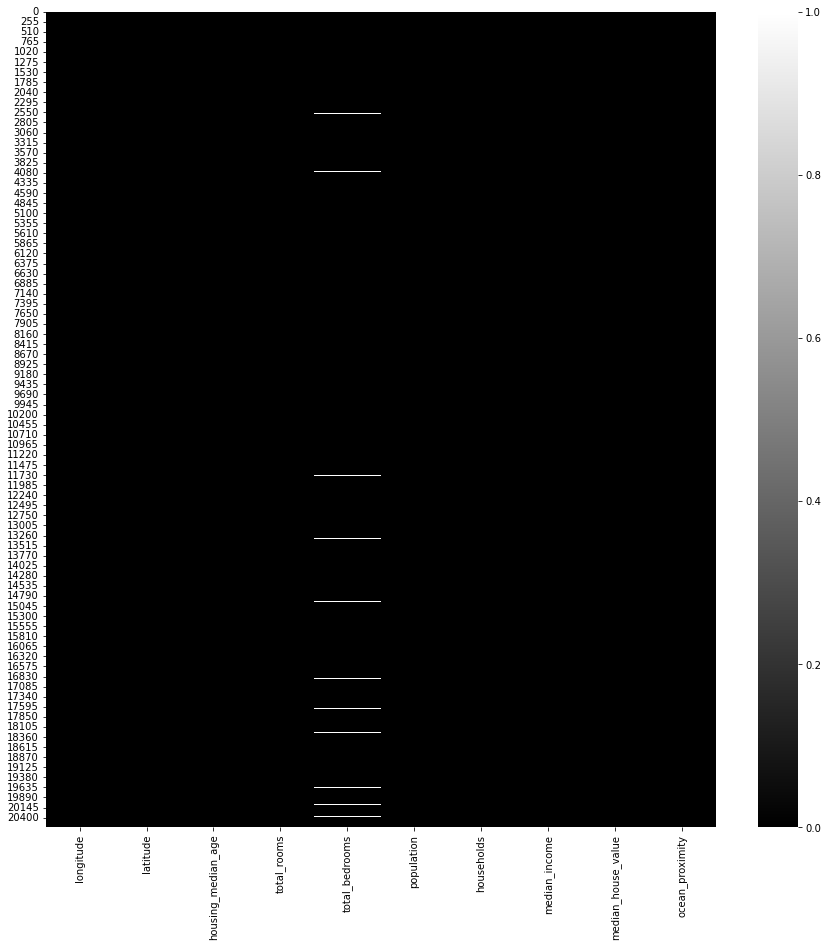

In [ ]:
# 결측치 위치 시각화 > isna() 함수를 적용 후 해당 결과를 seaborn heatmap으로 시각화
cmap='gray'
plt.figure(figsize=(15,15))
# code here
sns.heatmap(data=df.isna(), cmap=cmap)

plt.show()

In [ ]:
# total_bedrooms의 중앙값으로 결측치를 대체하세요.

df = df.fillna(df['total_bedrooms'].median(),axis=1)
# 결측치가 존재하는지 확인하세요.
df.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

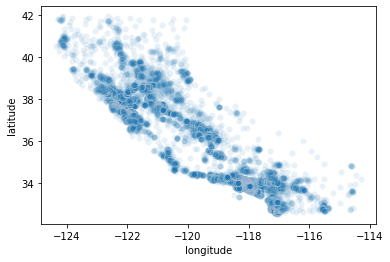

In [ ]:
# sns.scatterplot 함수를 사용하여 위도, 경도를 시각화하세요.
# alpha = 0.1

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', alpha = 0.1)
plt.show()

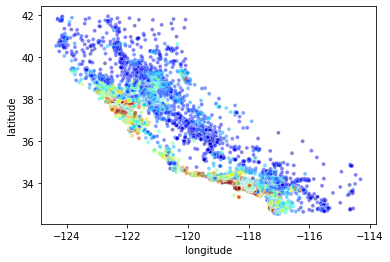

In [ ]:
# 위의 그래프에 median_house_value 별 색깔을 지정하세요.
# alpha = 0.5, hue = 'median_house_value', palette = plt.get_cmap('jet'), s = 15, legend = False

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', alpha = 0.5, hue = 'median_house_value', palette = plt.get_cmap('jet'), s = 15, legend = False)

plt.show()

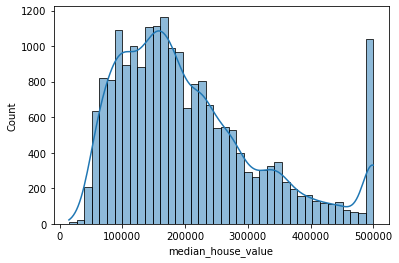

In [ ]:
# sns.histplot 함수를 사용하여 median_house_value 컬럼을 시각화하세요.
# kde=True, bins=40

sns.histplot(data = df, x = 'median_house_value',kde=True, bins=40)
plt.show()

In [ ]:
# 코드를 실행하세요.
## continuous 변수와 categorical 변수를 생성하세요.
# continuous : continuous type의 컬럼명이 담긴 리스트
# categorical : categorical type의 컬럼명이 담긴 리스트
continuous = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
categorical = ['ocean_proximity']

In [ ]:
# 범주형 컬럼인 ocean_proximity의 범주별 개수를 계산하세요.
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# 범주형 컬럼인 ocean_proximity의 범주별 비율을 계산하세요.
ocean = df['ocean_proximity'].value_counts() / len(df['ocean_proximity'])
ocean

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [ ]:
ocean = ocean.to_frame().reset_index()
ocean

,index,ocean_proximity
0,<1H OCEAN,0.442636
1,INLAND,0.317393
2,NEAR OCEAN,0.128779
3,NEAR BAY,0.110950
4,ISLAND,0.000242


<AxesSubplot:xlabel='index', ylabel='ocean_proximity'>

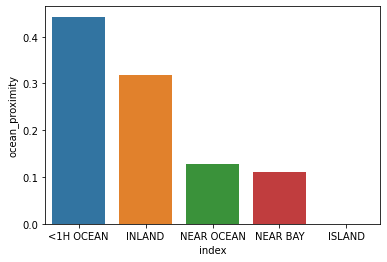

In [ ]:
# 해당 결과를 bar plot으로 시각화 해보세요.

sns.barplot(data=ocean, x='index', y ='ocean_proximity')

In [ ]:
# ocean_proximity 컬럼의 <1H OCEAN 값을 1H OCEAN으로 수정하세요
# < 기호를 제거합니다.

cond = df['ocean_proximity'] == '<1H OCEAN'
df.loc[cond, 'ocean_proximity'] = '1H OCEAN'

In [ ]:
# 범주형 컬럼인 ocean_proximity의 범주별 비율을 재계산하세요.
df['ocean_proximity'].value_counts() / len(df['ocean_proximity'])

1H OCEAN      0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [ ]:
# 데이터 프레임의 hist 함수를 사용하여 continuous컬럼의 분포를 확인하세요.
# bins=50, figsize=(20,15)를 적용하세요.

df.loc[:,continuous].hist(bins=50, figsize=(20,15))
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
# 코드를 실행하세요.
## 아래 컬럼은 log 변환을 적용해주세요.
# total_rooms, total_bedrooms, population, households, median_income, median_house_value
target_col = 'total_rooms, total_bedrooms, population, households, median_income, median_house_value'.split(', ')
for col_name in target_col:
    df[col_name] = np.log1p(df[col_name])

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log1p method

In [ ]:
# 데이터 프레임의 hist 함수를 사용하여 continuous컬럼의 분포를 재확인하세요.
# bins=50, figsize=(20,15)를 적용하세요.


df.loc[:,continuous].hist(bins=50, figsize=(20,15))
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
# continuous 컬럼을 표준화하세요. (StandardScaler)
from sklearn.preprocessing import StandardScaler

# df
df_x = df.loc[:,continuous]
x = StandardScaler().fit_transform(df_x) # numpy ndarray 형태로 바뀜
df_stand = pd.DataFrame(data=x, columns=continuous)
df_stand.loc[:, 'ocean_proximity'] = df['ocean_proximity']
df = df_stand
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [ ]:
# pd.get_dummies 함수를 이용하여 범주형 컬럼에 One Hot 변환을 적용하세요.

df = pd.get_dummies(df, columns=['ocean_proximity'])


df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0


In [ ]:
## X, y를 분리하세요.
# X : median_house_value 컬럼을 제외한 나머지 컬럼
# y : median_house_value 컬럼
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X.shape, y.shape

((20640, 13), (20640,))

In [ ]:
# X와 Y를 학습데이터와 검증데이터로 분리하세요.
# random_state = 0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.25)

In [ ]:
# DNN 모델을 생성하세요. (회귀 모델)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add( Dense(256, activation='relu',
                 input_shape=(X_train.shape[1],) ))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,217
Trainable params: 201,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일(compile)
# loss : mean absolute error, optimizer : adam, metrics : mean squared error
model.compile(
    loss='mean_absolute_error', 
    optimizer= 'adam',
    metrics= ['mean_squared_error']
    )

In [ ]:
# 학습(fit)
hist = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3890 - mean_squared_error: 0.3248
Epoch 2/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3444 - mean_squared_error: 0.2620
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3319 - mean_squared_error: 0.2486
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3209 - mean_squared_error: 0.2366
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3170 - mean_squared_error: 0.2309
Epoch 6/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3085 - mean_squared_error: 0.2214
Epoch 7/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3047 - mean_squared_error: 0.2161
Epoch 8/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3024 - mean_squared_error: 0.2161
Epoch 9/100
484/484 [==============================] - 1s 2ms/step - loss: 0.2974 - mean_squared_error: 0.2109
E

In [ ]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = model.predict(X_test)
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred))) # MSE 결과에 np.sqrt 함수 적용

In [ ]:
# R Squared 결과도 확인합니다.
from sklearn.metrics import r2_score
print('R2 :',r2_score(y_test, pred))

In [ ]:
# 실제 정답과 예측값을 scatter plot으로 그리세요.
plt.figure(figsize = (8,6))
# code here


plt.scatter(y_test, pd.DataFrame(pred)[0],c='orange',   s= 3 )
plt.plot([-3,2],[-3,2], c = 'red',lw = 0.5)

plt.xlabel('Target')
plt.ylabel('Predict')
plt.show()